In [1]:
import pandas as pd
import mysql.connector

from IPython.display import display, Markdown

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="secret",
    port="3306",
    database="serlo"
)

def read_event_log():
    df = pd.read_sql("""
        select event_log.id, event_log.date, event_log.actor_id,
        user.username, event_log.event_id, event.name
        from event_log
        join event on event.id = event_log.event_id
        join user on user.id = event_log.actor_id
        order by event_log.id
    """, db)
    df.set_index("id", inplace=True)
    return df

event_log = read_event_log()

/home/kulla/.local/share/asdf/installs/python/3.9.1/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [125]:
def func(x):
    try:
        x["diff"] = x["date"].diff()
        x.dropna(inplace=True)
        return x
    except ValueError:
        display(x)

def get_diff():        
    df = event_log[(event_log["date"] > pd.to_datetime("2015-01-01")) & (event_log["event_id"] == 5)].copy()
    df = df.groupby("actor_id").apply(func).reset_index(drop=True)
    df["minutes"] = df["diff"].map(lambda x: x.total_seconds() / 60)
    df["hours"] = df["diff"].map(lambda x: x.total_seconds() / 60 / 60)
    df["days"] = df["diff"].map(lambda x: x.total_seconds() / 60 / 60 / 24)
    df["seconds"] = df["diff"].map(lambda x: x.total_seconds())
    
    return df

df_all = get_diff()
df_all.head()

,date,actor_id,username,event_id,name,diff,minutes,hours,days,seconds
0,2015-06-19 13:18:30,1,arekkas,5,entity/revision/add,46 days 05:42:14,66582.233333,1109.703889,46.237662,3994934.0
1,2015-10-24 22:53:28,1,arekkas,5,entity/revision/add,127 days 09:34:58,183454.966667,3057.582778,127.399282,11007298.0
2,2015-10-27 00:03:08,1,arekkas,5,entity/revision/add,2 days 01:09:40,2949.666667,49.161111,2.048380,176980.0
3,2015-11-01 09:02:19,1,arekkas,5,entity/revision/add,5 days 08:59:11,7739.183333,128.986389,5.374433,464351.0
4,2015-11-01 09:07:45,1,arekkas,5,entity/revision/add,0 days 00:05:26,5.433333,0.090556,0.003773,326.0


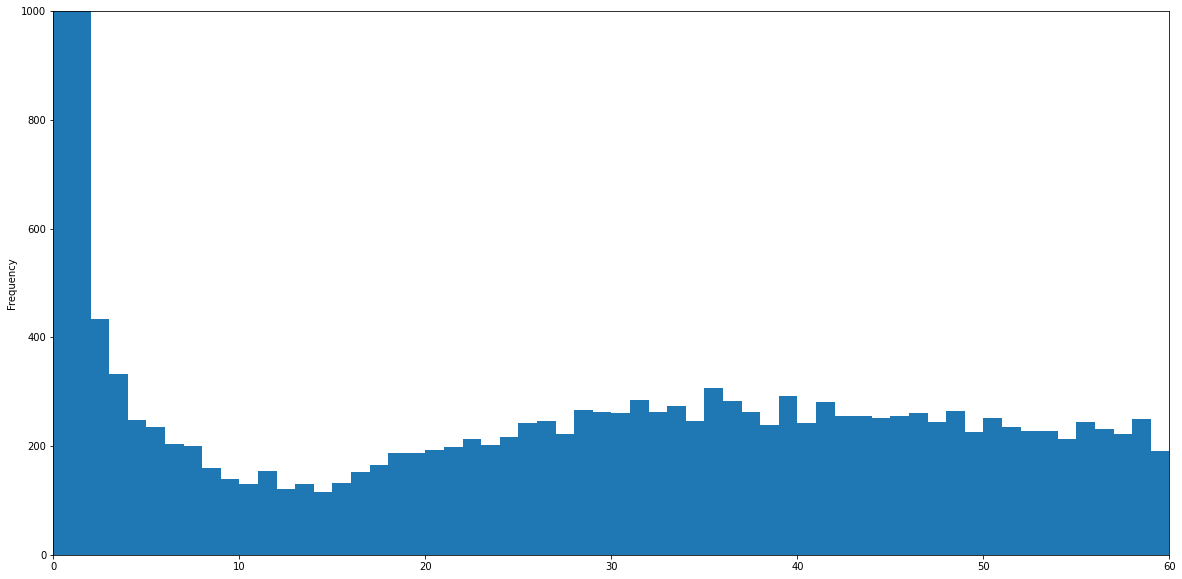

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def plot_s_hist(df, s=60):
    bins = np.linspace(0, s, s+1)
    df[df["seconds"] < s]["seconds"].plot.hist(bins=bins, xlim=(0,s), figsize=(20,10), ylim=(0,1000))
    plt.show()
    
plot_s_hist(df_all)

,date,actor_id,username,event_id,name,diff,minutes,hours,days,seconds
0,2015-06-19 13:18:30,1,arekkas,5,entity/revision/add,46 days 05:42:14,66582.233333,1109.703889,46.237662,3994934.0
1,2015-10-24 22:53:28,1,arekkas,5,entity/revision/add,127 days 09:34:58,183454.966667,3057.582778,127.399282,11007298.0
2,2015-10-27 00:03:08,1,arekkas,5,entity/revision/add,2 days 01:09:40,2949.666667,49.161111,2.048380,176980.0
3,2015-11-01 09:02:19,1,arekkas,5,entity/revision/add,5 days 08:59:11,7739.183333,128.986389,5.374433,464351.0
4,2015-11-01 09:07:45,1,arekkas,5,entity/revision/add,0 days 00:05:26,5.433333,0.090556,0.003773,326.0


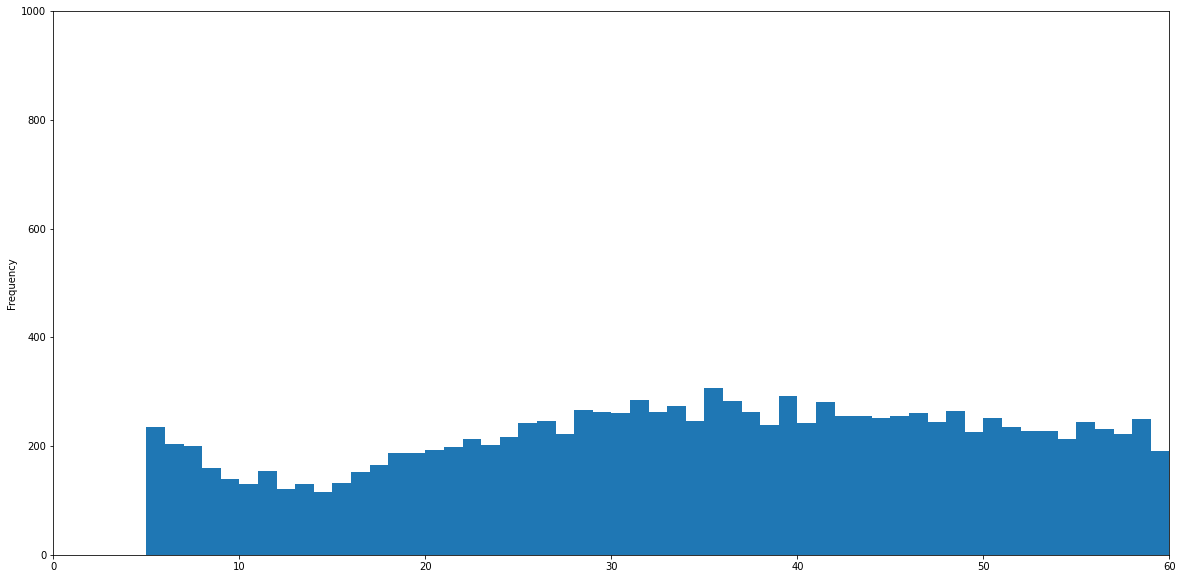

In [275]:
def get_diff2():
    df = get_diff()
    
    df.drop(df[df["seconds"] < 5].index, inplace=True)
    return df

df = get_diff2()
m = df["minutes"]
display(df.head())
plot_s_hist(df)

In [128]:
df["days"].describe()

count    76880.000000
mean         1.630584
std         17.946226
min          0.000116
25%          0.001181
50%          0.004248
75%          0.027352
max        993.229317
Name: days, dtype: float64

In [158]:
df["minutes"].describe()

count    7.781800e+04
mean     2.319740e+03
std      2.568762e+04
min      8.333333e-02
25%      1.633333e+00
50%      5.891667e+00
75%      3.786250e+01
max      1.430250e+06
Name: minutes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

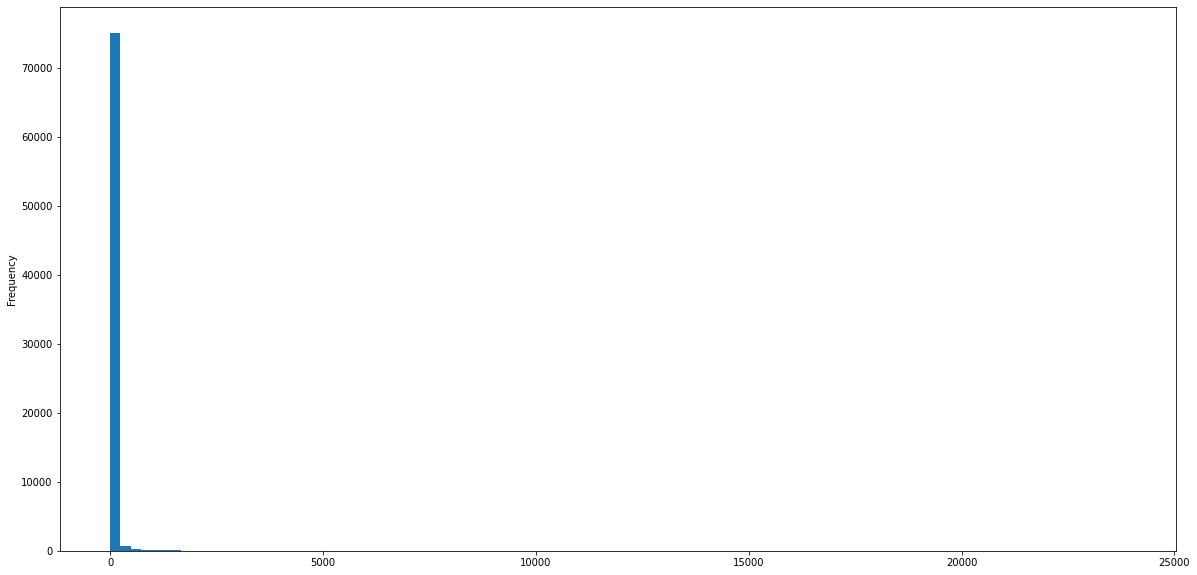

In [135]:
h = df["hours"]
h.plot.hist(figsize=(20,10), bins=100)

<AxesSubplot:ylabel='Frequency'>

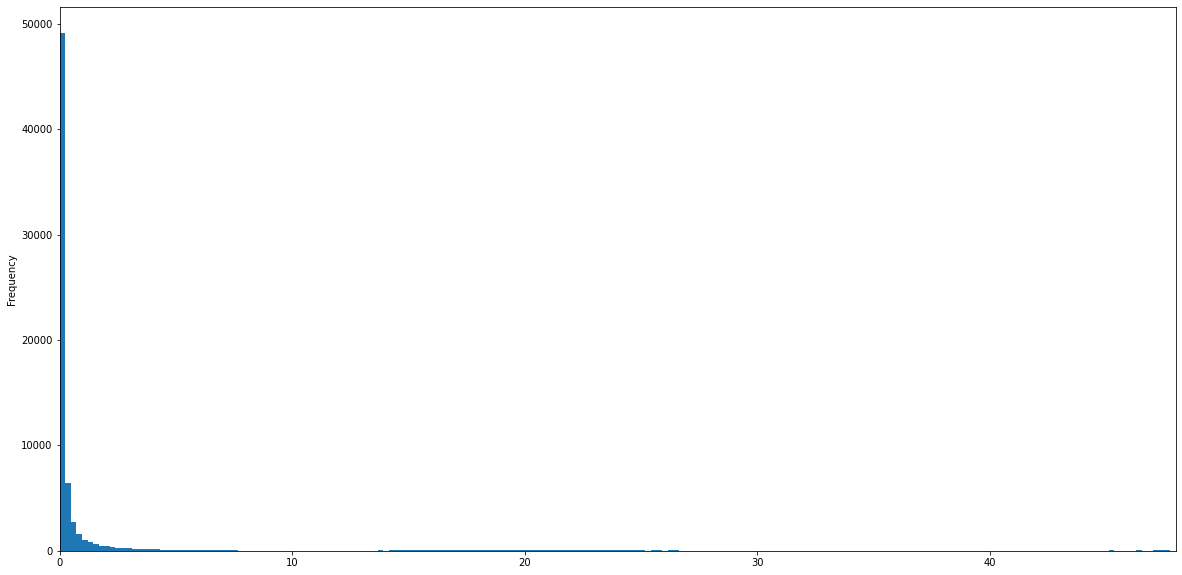

In [136]:
h[h < 48].plot.hist(figsize=(20,10), bins=200, xlim=(0,48))

In [137]:
h[h < 48].describe()

count    71529.000000
mean         2.108216
std          6.707462
min          0.002778
25%          0.026111
50%          0.084167
75%          0.382500
max         47.997778
Name: hours, dtype: float64

<AxesSubplot:ylabel='Frequency'>

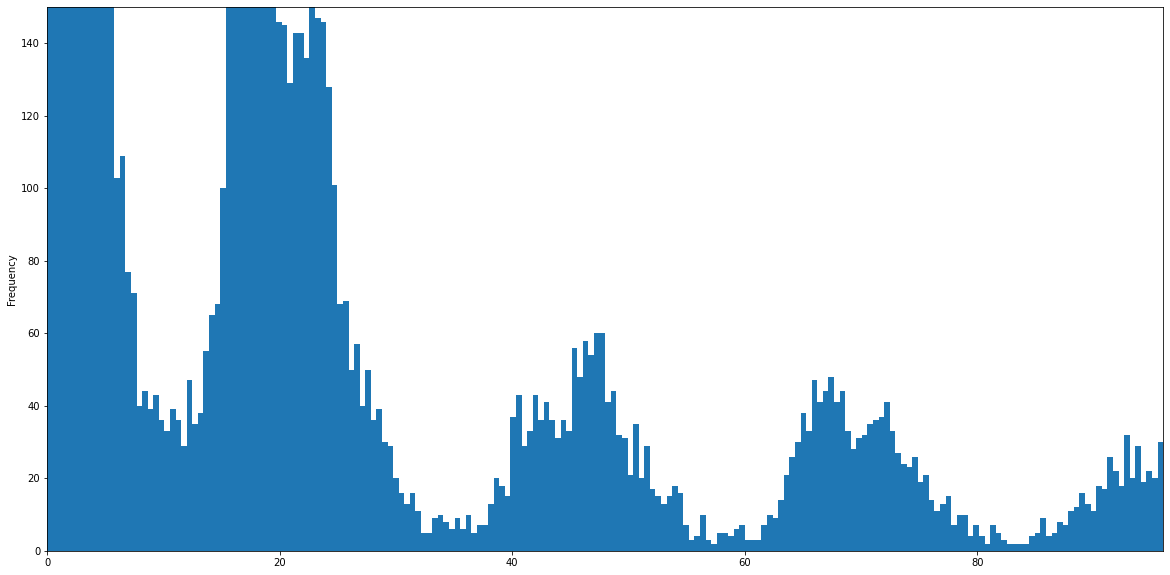

In [145]:
h[h < 96].plot.hist(figsize=(20,10), bins=200, xlim=(0,96), ylim=(0,150))

<AxesSubplot:ylabel='Frequency'>

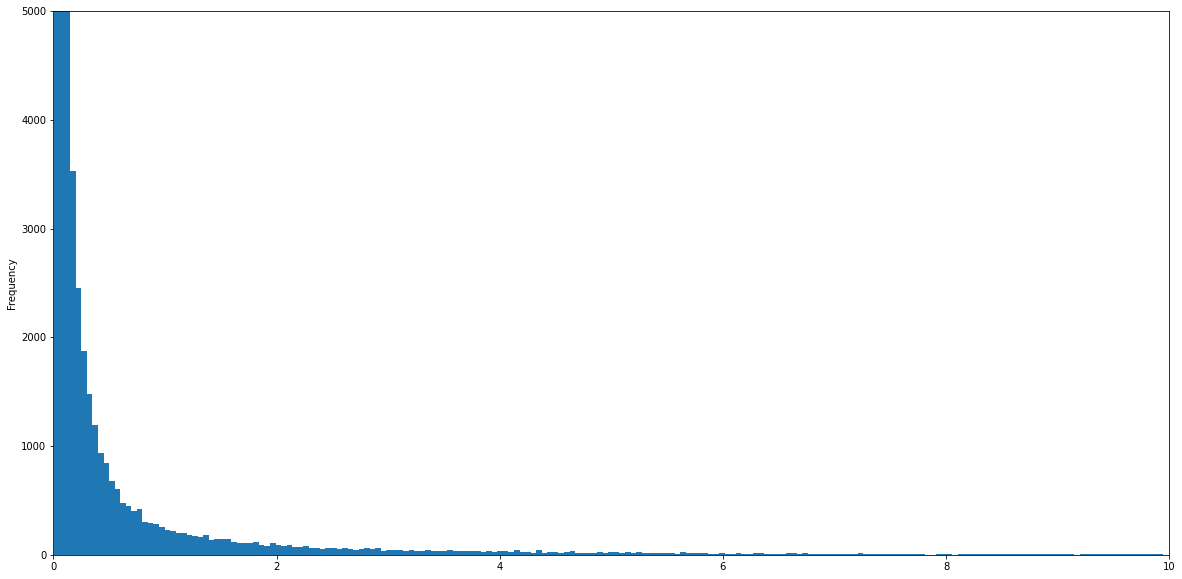

In [139]:
h[h < 10].plot.hist(figsize=(20,10), bins=200, xlim=(0,10), ylim=(0,5000))

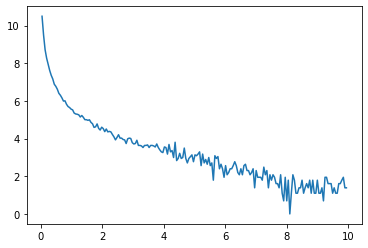

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import math

count, bins = np.histogram(m[m < 10], bins=200)

plt.plot(bins[1:], np.log(count))

<AxesSubplot:ylabel='Frequency'>

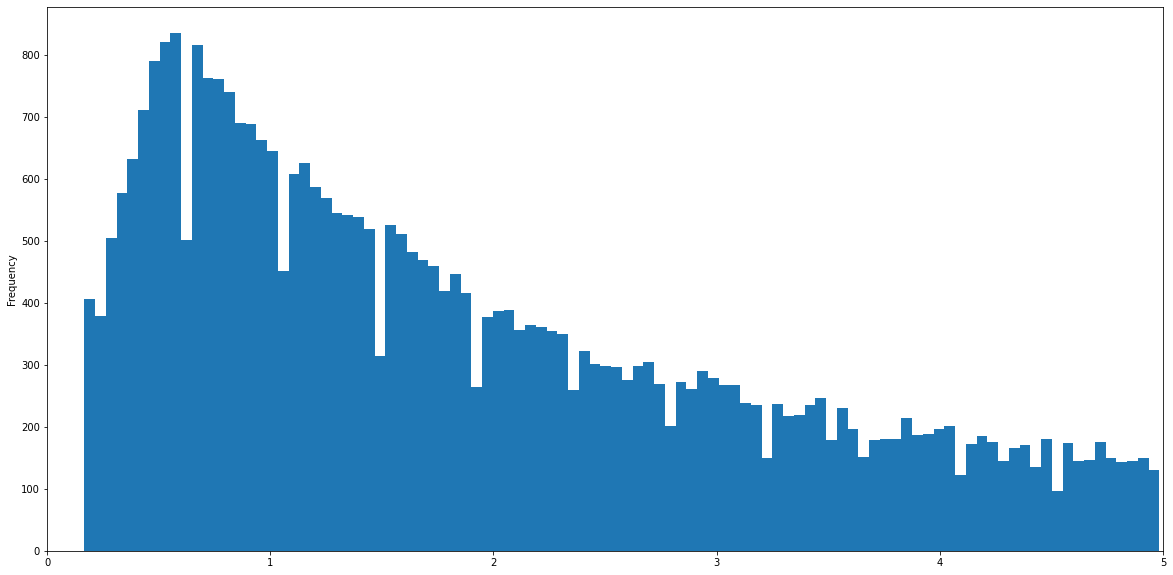

In [151]:
m = df["minutes"]
m[m < 5].plot.hist(figsize=(20,10), bins=100, xlim=(0,5))

count    36553.000000
mean         1.837933
std          1.285907
min          0.083333
25%          0.766667
50%          1.516667
75%          2.716667
max          4.983333
Name: minutes, dtype: float64

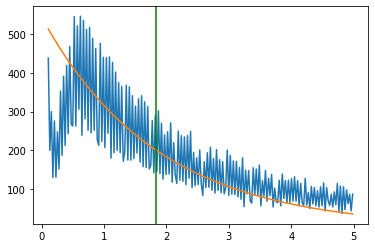

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math

m_max=5
count, bins = np.histogram(m[m < m_max], bins=200)
xs = bins[1:]

display(m[m < m_max].describe())
mu = m[m < m_max].mean()
l = 1/mu

plt.plot(xs, count)
plt.plot(xs, l * np.exp(-l * xs)*1000)
#plt.ylim(0,9)
plt.axvline(mu, color="green")

<AxesSubplot:ylabel='Frequency'>

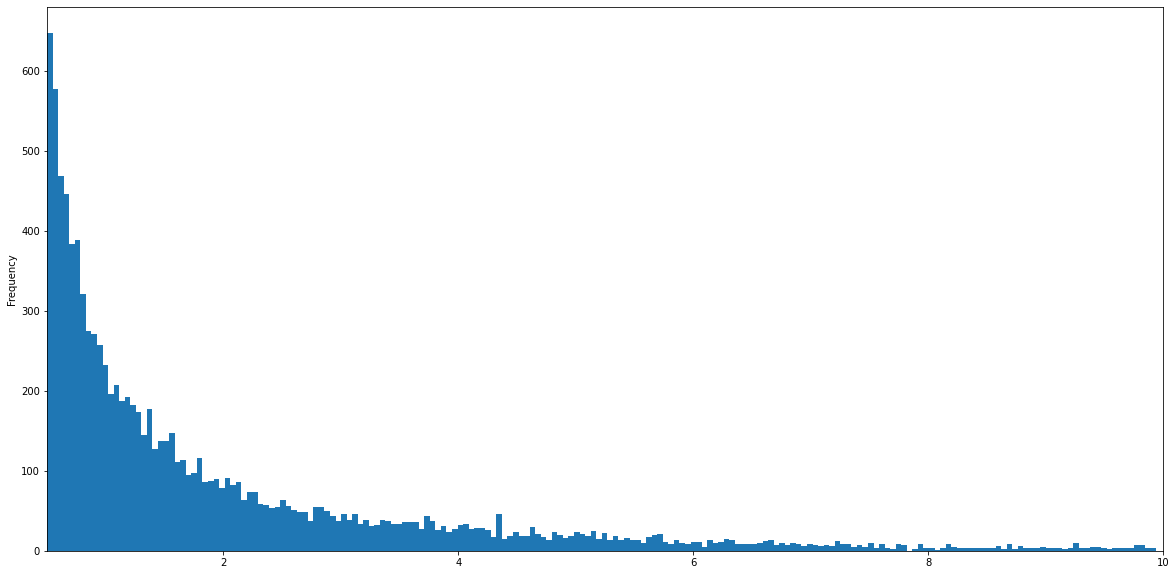

In [194]:
h[(h < 10) & (h>0.5)].plot.hist(figsize=(20,10), bins=200, xlim=(0.5,10))

In [143]:
h[h < 0.2].describe()

count    46944.000000
mean         0.055607
std          0.049574
min          0.002778
25%          0.017222
50%          0.037500
75%          0.080833
max          0.199722
Name: hours, dtype: float64

# Weibull distribution

https://en.wikipedia.org/wiki/Weibull_distribution#Parameter_estimation

(0.8955861715077855, 0.08333333333333331, 4.1824763863601735)


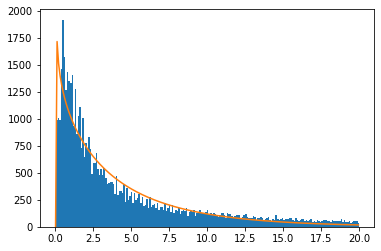

In [304]:
import scipy.stats as stats

n_bins=200
m_max=20
data = m[m < m_max]

params = stats.weibull_min.fit(data, loc=5/60)
print(params)

values,bins,hist = plt.hist(data, bins=n_bins,range=(0,m_max), label="hist")

xs = (bins[:-1] + bins[1:]) / 2.
ys = stats.weibull_min.pdf(xs,*params)*len(data)*m_max/n_bins

plt.plot(xs, ys,label="weibull")

plt.show()

In [305]:
df["hours"].describe()

count    77818.000000
mean        38.662334
std        428.126977
min          0.001389
25%          0.027222
50%          0.098194
75%          0.631042
max      23837.503611
Name: hours, dtype: float64

<AxesSubplot:ylabel='Frequency'>

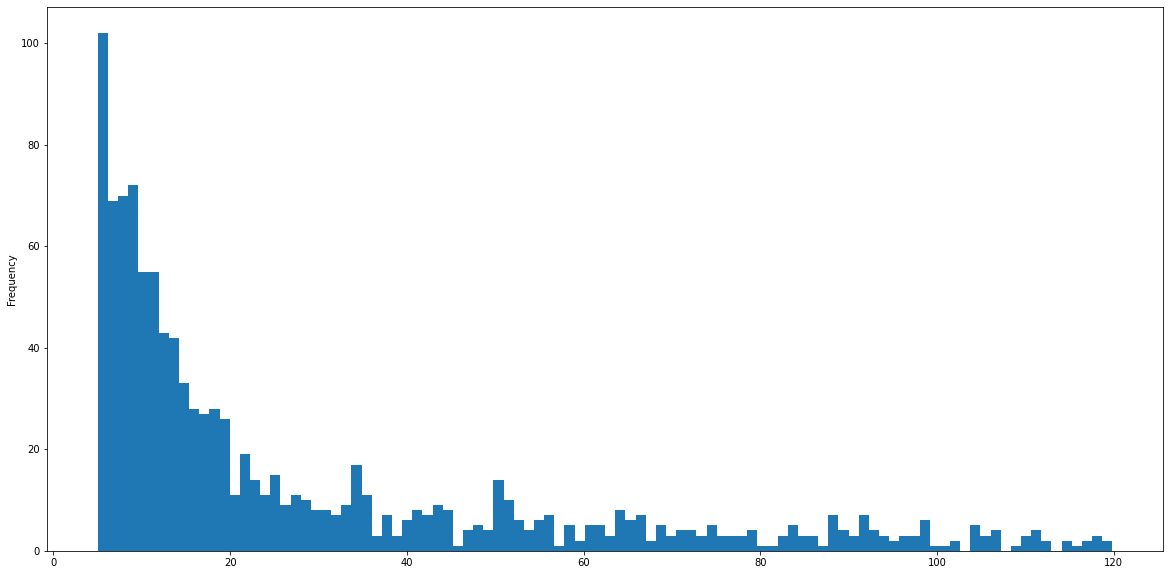

In [301]:
km = df[df["username"] == "chdieter"]["minutes"]
km[(km < 120) & (km > 5)].plot.hist(bins=100, figsize=(20,10))